In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.layers import Input,Dense, Dropout
from keras.models import Model,Sequential
from sklearn.metrics import roc_curve, auc, f1_score, precision_recall_curve, precision_score,recall_score,accuracy_score,confusion_matrix

### Link to Paper

https://arxiv.org/pdf/1809.10717.pdf

In [2]:
DATA_DIR = '/Users/PeterC/Documents/gt/practicum/autoencoders/data/'
DATA_DIR = '/Users/chenpete/Documents/ESP/practicum/autoencoders/data/'

In [3]:
df = pd.read_csv(DATA_DIR + 'paper_mill_rare_events.csv')
df['time'] = pd.to_datetime(df['time'])

In [5]:
df['y'].value_counts()

0    18274
1      124
Name: y, dtype: int64

# XGBoost 

In [92]:
import xgboost 

early_step = 1
df['y_early'] = 0

failure_count = 1
for i in range(df.shape[0]):
    if df.iloc[i]['y'] == 1:
        df.loc[i-early_step,'y_early'] = 1

y_cols = ['y']

x_cols = [
        'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59',
       'x60','x61'
]

X = df[x_cols]
y = df[y_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,random_state=0,stratify = y)

In [68]:
clf_xgb = xgboost.XGBClassifier()
clf_xgb.fit(X_train,y_train)

y_pred=clf_xgb.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for reconstruction error classification')
plt.legend(loc="lower right")
plt.show()

print('f1 score :{:.2f}'.format(f1_score(y_test,y_pred)))
print('roc auc score :{:.2f}'.format((roc_auc)))
print('precision score :{:.2f}'.format(precision_score(y_test,y_pred)))
print('recall score :{:.2f}'.format(recall_score(y_test,y_pred)))

In [103]:
def simple_ann_clf():
    model = Sequential()
    model.add(Dense(units = 32,activation='relu',input_shape = (len(x_cols),)))
    model.add(Dropout(.2))
    model.add(Dense(units = 16,activation='relu'))
    model.add(Dropout(.2))
    model.add(Dense(units = 1,activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

In [105]:
y_train['y'].value_counts()

0    16446
1      112
Name: y, dtype: int64

Epoch 1/50
16558/16558 [==============================] - 2s 98us/step - loss: 0.3690
Epoch 2/50
16558/16558 [==============================] - 1s 57us/step - loss: 0.1201
Epoch 3/50
16558/16558 [==============================] - 1s 57us/step - loss: 0.1115
Epoch 4/50
16558/16558 [==============================] - 1s 60us/step - loss: 0.1101
Epoch 5/50
16558/16558 [==============================] - 1s 61us/step - loss: 0.1113
Epoch 6/50
16558/16558 [==============================] - 1s 58us/step - loss: 0.1094
Epoch 7/50
16558/16558 [==============================] - 1s 58us/step - loss: 0.1110
Epoch 8/50
16558/16558 [==============================] - 1s 57us/step - loss: 0.1095
Epoch 9/50
16558/16558 [==============================] - 1s 57us/step - loss: 0.1108
Epoch 10/50
16558/16558 [==============================] - 1s 59us/step - loss: 0.1091
Epoch 11/50
16558/16558 [==============================] - 1s 57us/step - loss: 0.1099
Epoch 12/50
16558/16558 [===========================

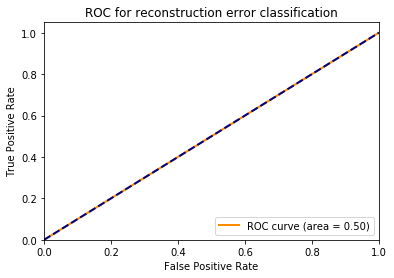

accuracy score :0.99
f1 score :0.00
roc auc score :0.50
precision score :0.00
recall score :0.00


/Users/chenpete/Documents/code/DL/dlenv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/chenpete/Documents/code/DL/dlenv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [109]:
clf_ann = simple_ann_clf()
clf_ann.fit(X_train,y_train,batch_size=16,epochs=50)

y_pred=clf_ann.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for reconstruction error classification')
plt.legend(loc="lower right")
plt.show()

print('accuracy score :{:.2f}'.format(accuracy_score(y_test,y_pred)))
print('f1 score :{:.2f}'.format(f1_score(y_test,y_pred)))
print('roc auc score :{:.2f}'.format((roc_auc)))
print('precision score :{:.2f}'.format(precision_score(y_test,y_pred)))
print('recall score :{:.2f}'.format(recall_score(y_test,y_pred)))

In [111]:
confusion_matrix(y_test,y_pred)

array([[1828,    0],
       [  12,    0]])